# GRB identikit
The aim of this notebook is to allow the user to have an overview of the event properties (redshift, energy, flux...)

## Imports


In [1]:
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd
from astropy.visualization import astropy_mpl_style, quantity_support
from astropy.time import Time
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from os.path import join
sys.path.append('../lib')
from visibility import *
plt.style.use(astropy_mpl_style)
quantity_support();

## General info
A table is given with GRB's general properties in csv format (this is a 're-formatted' verison of Giancarlo's txt table)

In [2]:
df=pd.read_csv('table_1000_long.csv', index_col=0)

In [3]:
df.head()

,Num,Ra,Dec,Redshift,Eiso,Liso,Epeak,Duration,Gamma0(H),Gamma0(W),Phflux(15-150),alfa,beta,PhFlux(10-1000)
0,1,211.3340,71.0714,2.358773,3.873160e+53,3.471493e+52,602.763363,108.845,153.147,96.239,3.370,-1.130,-2.380,4.820
1,2,82.4082,-23.5267,1.131562,1.684641e+53,1.130565e+52,396.028272,88.762,424.473,165.292,6.918,-1.049,-2.509,9.830
2,3,92.1914,35.9299,2.023389,5.181373e+53,1.973927e+52,560.332365,259.619,362.259,179.344,2.714,-0.955,-2.473,3.836
3,4,11.8900,42.4303,2.852917,7.321880e+52,3.195091e+52,278.800372,22.905,253.767,102.093,3.175,-0.930,-2.438,4.337
4,5,105.1957,-14.9235,2.944518,1.547294e+53,4.593979e+52,568.000476,53.856,220.795,105.403,3.439,-1.002,-2.689,4.748


In [4]:
df.sort_values('Eiso')

,Num,Ra,Dec,Redshift,Eiso,Liso,Epeak,Duration,Gamma0(H),Gamma0(W),Phflux(15-150),alfa,beta,PhFlux(10-1000)
618,619,184.7983,-36.0448,0.737209,1.067603e+50,1.495638e+51,13.900669,0.686,42.934,10.516,3.440,-1.008,-2.559,6.623
413,414,94.4073,-65.4611,0.391341,3.087096e+50,3.486320e+50,24.805385,4.110,45.667,13.079,4.764,-0.954,-2.357,7.846
34,35,25.3093,-23.7438,1.099097,5.159761e+50,5.085106e+51,51.931694,0.527,251.545,44.441,7.020,-0.985,-2.600,10.887
978,979,172.7977,-79.2703,0.638567,7.600981e+50,9.976745e+50,41.118605,4.046,274.725,50.274,4.649,-1.160,-2.485,7.253
25,26,351.7934,-39.6616,0.369044,7.618883e+50,3.670657e+50,54.108139,10.022,158.370,34.836,6.278,-0.926,-2.413,9.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,766,30.5821,-12.6434,1.940603,6.575459e+54,4.374073e+52,1572.784388,1759.781,670.904,413.074,3.292,-1.071,-2.503,5.274
756,757,246.3766,-2.8586,1.397700,7.492617e+54,4.359983e+52,1085.365386,849.029,1213.903,626.847,7.867,-1.072,-2.384,12.354
784,785,80.1508,-57.8066,2.107246,1.187253e+55,6.535604e+53,3724.799912,178.472,734.539,484.210,19.718,-1.029,-2.541,34.829
211,212,339.6022,-15.4391,1.922033,1.396238e+55,9.247220e+53,23172.692295,99.376,1582.178,829.717,5.550,-0.941,-2.618,11.373


In [5]:
for i in range(len(df.Num)):
    if df.Eiso[i]>9.5e52 and df.Eiso[i]<1e53:
        print (df.Num[i],df.Redshift[i],df.Eiso[i])

118 1.9068725702151728 9.590404844058931e+52
161 1.001615747060123 9.563534061691005e+52
244 1.1784073069272898 9.7788077511508e+52
262 2.602684246797491 9.615699602082197e+52
372 2.0845663136439505 9.972210993794282e+52
413 1.727189558472224 9.766376028377358e+52
538 1.3790455881934067 9.837619633912612e+52
547 2.047380320695224 9.583338906146495e+52
875 1.9607503662822507 9.90195397010408e+52
991 0.8734011464207019 9.548340826637492e+52


### Chosing the Event to study

In [6]:
event_number = 12
event_id= f'Event{event_number}'  #name of the event you want to plot (usefull when using catalog tables of significance)
phase = 'afterglow'

In [7]:
evt_details = df.loc[event_number-1] # per localizzare un evento devo dare il numero di riga. 
evt_details                          # ricordati che le righe partono da 0, gli eventi da 1

Num                1.200000e+01
Ra                 2.866209e+02
Dec               -2.048380e+01
Redshift           1.288574e+00
Eiso               2.081790e+53
Liso               2.379591e+52
Epeak              7.821273e+02
Duration           6.881000e+01
Gamma0(H)          1.502650e+02
Gamma0(W)          8.568600e+01
Phflux(15-150)     6.687000e+00
alfa              -1.060000e+00
beta              -2.457000e+00
PhFlux(10-1000)    1.016000e+01
Name: 11, dtype: float64

N.B. the same properties can be read from fits file. Here you are an example:

In [8]:
hdul = fits.open(f'/home/irene/cta/input/afterglow/{event_id}.fits') 
hdr = hdul[0].header
z = hdr['z']
Eiso = hdr ['EISO']
t_trigger = Time(hdr['GRBJD'] * u.day, format='jd')

While fits file is open we read some quantities which will be useful later to compute visibility

In [9]:
source_radec = SkyCoord(ra=hdr['RA'] * u.deg, dec=hdr['DEC'] * u.deg, frame='icrs')  # source coordinates
visibility_table = Table.read(hdul, hdu=1)  # visibility table

In [10]:
print (f'Reshift: {z}')
print (f'Eiso: {Eiso}')
print (f'trigger time: {t_trigger.isot}')

Reshift: 1.28857387087
Eiso: 2.08179029849e+53
trigger time: 2022-05-27T04:35:08.485


# Flux 

In [11]:
# reading Energy from Lara's files. 
grb_Eval     = Table.read(hdul,hdu=2)["Energies (afterglow)"].quantity
# reading time intervals form Lara's files
grb_tval     = Table.read(hdul,hdu=3)["Times (afterglow)"].quantity 

In [12]:
flux         = Table.read(hdul,hdu=4)
abs_flux     = Table.read(hdul,hdu=5)

In [13]:
flux_unit = u.Unit("1 /(cm2 GeV s)")

In [14]:
icol_t  = len(abs_flux.colnames)              # column number - time
jrow_E  = len(abs_flux[abs_flux.colnames[0]]) # row number
# Note the transposition from flux to fluxval

# ABSORBED
grb_fluxval_abs = np.zeros( (icol_t,jrow_E) )*flux_unit
for i in range(0,icol_t):
    for j in range(0,jrow_E):
        f = abs_flux[j][i]    # Lara's values are in units of 1/(GeV cm2 s)
        grb_fluxval_abs[i][j] = f*flux_unit # transp!

# TRUE
grb_fluxval = np.zeros( (icol_t,jrow_E) )*flux_unit
for i in range(0,icol_t):
    for j in range(0,jrow_E):
        f = flux[j][i] 
        grb_fluxval[i][j] = f*flux_unit # transp!

In [15]:
f_time=[]
f_nonabs=[]
for i in range(0,icol_t):
    #print (grb_fluxval_abs[i].value.sum())
    f_time.append(grb_fluxval_abs[i].value.sum())
    f_nonabs.append(grb_fluxval[i].value.sum())

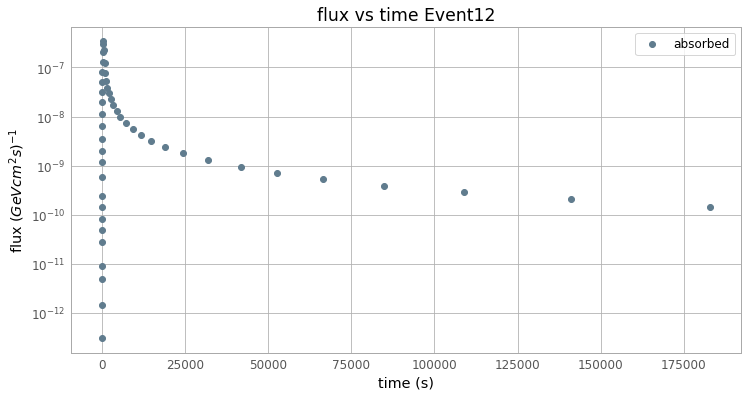

In [16]:
fig, axes = plt.subplots(1 ,figsize=(12,6))
axes.scatter(grb_tval.value, f_time, color='#607c8e', label = 'absorbed')
#axes.scatter(grb_tval.value, f_nonabs, color='orange',marker = '*', label='non absorbed')
axes.set_xlabel(r'time (s)')
axes.set_ylabel(r'flux $(GeV cm^2 s)^{-1}$')
#axes.set_xlim(-1e2,1e3)
#axes.set_ylim(1e-7,1e-6)
axes.set_yscale('log')
axes.legend()
axes.set_title(f'flux vs time {event_id}')
plt.savefig(f"examples/Flux_GeV_{event_id}.png", dpi=72)
plt.show()

# Visibility
This part is taken from Ambra's notebook 'plotVisibility'

In [17]:
# add table file
table = '/home/irene/provepy/VisCat/LONG_FITS.noMoon.thresh24.NEW.npy'

# grb template name
grb = event_id
# site (check independently north and south!!!)
site = 'North'

# check data from table to compare later with independent results
data = np.load(table, allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
data[grb]['North'], data[grb]['South']

({'night01': {'start': 2459726.69107043,
   'stop': 2459726.69681865,
   'irfs': {'start': array([2459726.69107043]),
    'stop': array([2459726.69681865]),
    'zref': array([40])}},
  'night02': {'start': 2459727.39892427,
   'stop': 2459727.69646319,
   'irfs': {'start': array([2459727.53848457, 2459727.60132789]),
    'stop': array([2459727.60132789, 2459727.69646319]),
    'zref': array([60, 40])}},
  'night03': {'start': 2459728.39944763,
   'stop': 2459728.69612071,
   'irfs': {'start': array([2459728.53560687, 2459728.5979373 ]),
    'stop': array([2459728.5979373 , 2459728.69612071]),
    'zref': array([60, 40])}}},
 {'night01': {'start': 2459726.69107043,
   'stop': 2459726.91383418,
   'irfs': {'start': array([2459726.69107043, 2459726.71409471]),
    'stop': array([2459726.71409471, 2459726.91383418]),
    'zref': array([40, 20])}},
  'night02': {'start': 2459727.47330667,
   'stop': 2459727.91409663,
   'irfs': {'start': array([2459727.60985915, 2459727.64705253, 2459727.7

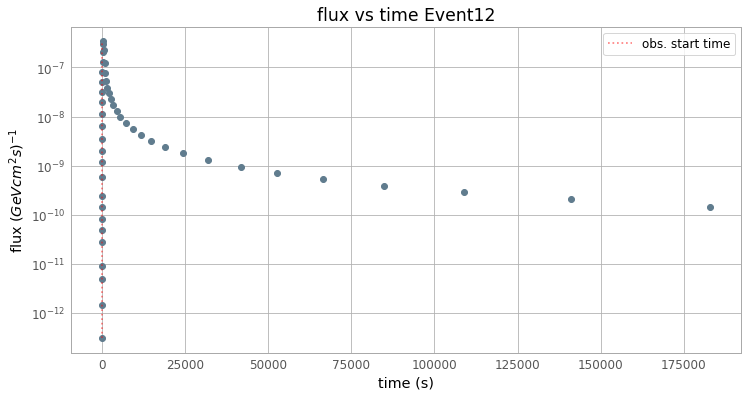

In [18]:
fig, axes = plt.subplots(1 ,figsize=(12,6))
axes.scatter(grb_tval.value, f_time, color='#607c8e')
axes.vlines((data[event_id][site]['night01']['irfs']['start'][0] - t_trigger.value)*86400,
          min(f_time),max(f_time),color = 'red', label ='obs. start time', alpha=0.5,linestyle= ':')
axes.set_xlabel(r'time (s)')
axes.set_ylabel(r'flux $(GeV cm^2 s)^{-1}$')
axes.set_yscale('log')
#axes.set_xlim(-1e2,1e3)
axes.set_title(f'flux vs time {event_id}')
axes.legend()
#plt.savefig(f"examples/Flux_GeV_{event_id}.png", dpi=72)
plt.show()

In [19]:
times = grb_tval.value
print(visibility_table)

       True             Twilight            Event       
        JD                 JD                 JD        
------------------ ------------------ ------------------
 2459726.691070428 2459726.3984091086 2459726.4858593117
2459726.6968191545 2459726.6968191545 2459726.8482539016
 2459726.691070428 2459726.4734049146  2459726.568461109
 2459726.913837907  2459726.913837907 2459727.0566409216


In [20]:
# event total duration
afterglow_duration = Time((times[-1] - times[1]) / 86400, format='jd')
# time windows [THIS SHOULD BE CHANGED ACCORDING TO THE TEMPLATE FORMAT]
t = [Time(visibility_table['True'].data, format='jd')]  # Doesn't have more >1 visibility window to test
t_true = []
for row in t:
    t_true.append(row[0:2])
# minimum altitude
min_altitude = visibility_table.meta['MIN_ALT'] * u.deg
# set IRF altitude thresholds
thresholds = tuple(sorted([24, 36, 57]))  # zenith 80 - 54 - 33 - 0
# set IRF reference zenith angles
zenith_angles = tuple(sorted([20, 40, 60], reverse=True))

*** 2459726.691070428 2459728.8091030163

Event full duration
nights: {'start': array([2459726.69107043, 2459727.39898335, 2459728.39952812]), 'stop': array([2459726.69668842, 2459727.69646178, 2459728.69596945])}


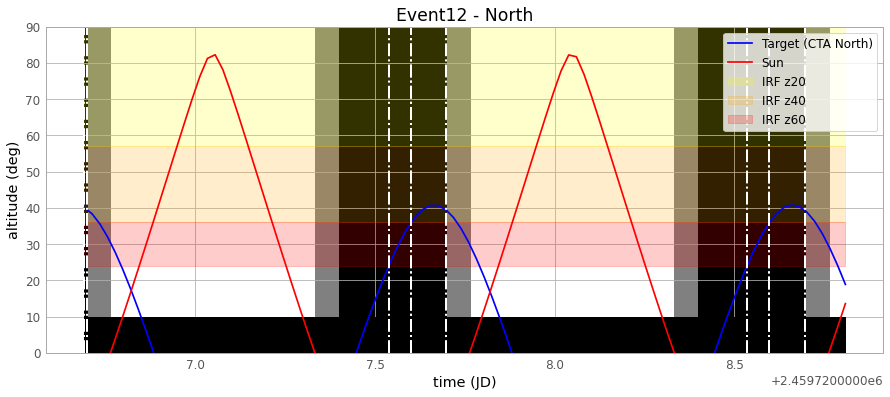

In [21]:
if_moon = False
if_markers = True
twilight = -18
moon_sep = 30

sites = {'North': 'Roque de los Muchachos', 'South': 'Paranal'}
# initialise site coordinates
north_site_coords = EarthLocation.of_site(sites['North'])
south_site_coords = EarthLocation.of_site(sites['South'])
if site == 'North':
    site_coords = north_site_coords
else:
    site_coords = south_site_coords

# initialise visibility
t_start = t_trigger
#duration = Time(2, format='jd')  
duration = afterglow_duration
print('***', t_trigger, t_trigger.value + afterglow_duration.value)
total_points = 100
night_points = 10

fig,ax1 = plt.subplots(1,figsize=(15,6))



# ignore warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    print('\nEvent full duration')
    # initialise
    visibility = Visibility()
    # visibility points in JD and AltAz
    visibility.visibility_points(t_start, duration, total_points)
    visibility.visibility_altaz(source_radec, sites[site])
    # find nights
    nights_twilight = visibility.get_nighttime(0)
    nights_astronomical = visibility.get_nighttime(-18)
    if moon_sep == 0:
        nights = visibility.get_nighttime(twilight=twilight)
    else:
        nights = visibility.get_nighttime_moonlight(twilight=twilight, moon_sep=moon_sep)
    print('nights:', nights)
    # plot source
    #ax1.plot(visibility.vis_points.value, visibility.altaz.alt.value, 'bo', label='Target (CTA %s)' % site)
    ax1.plot(visibility.vis_points.value, visibility.altaz.alt.value, 'b-', label='Target (CTA %s)' % site)
    # plot min altitude
    ax1.fill_between(visibility.vis_points.value, 0, min_altitude.value, color='k', zorder=1)
    # plot sun
    ax1.plot(visibility.vis_points.value, visibility.sun_altaz.alt.value, color='r', label='Sun')
    # plot moon
    if if_moon:
        visibility.moon_position()
        ax1.plot(visibility.vis_points.value, visibility.moon_altaz.alt, color='gray', ls='--', label='Moon')
    # plot irf
    ax1.fill_between(visibility.vis_points.value, thresholds[2], 90, color='yellow', alpha=0.2, label='IRF z20')
    ax1.fill_between(visibility.vis_points.value, thresholds[1], thresholds[2], color='orange', alpha=0.2, label='IRF z40')
    ax1.fill_between(visibility.vis_points.value, thresholds[0], thresholds[1], color='red', alpha=0.2, label='IRF z60') 
    # compute moon sky distance
    moon_dist = visibility.moon_altaz.separation(visibility.altaz)
    
    # clear
    del visibility

    # within each night find IRFs
    for i in range(len(nights['start'])):
        #print('Night', i+1, 'of', len(nights['start']))
        # plot nights
        ax1.fill_between([nights_twilight['start'][i], nights_twilight['stop'][i]], 0, 90, color='0.5', zorder=0)
        if len(nights_astronomical['start']) > i:
            ax1.fill_between([nights_astronomical['start'][i], nights_astronomical['stop'][i]], 0, 90, color='k', zorder=0)
            
        # initialise night visibility
        t_start = Time(nights['start'][i], format='jd')
        duration = Time(nights['stop'][i] - nights['start'][i], format='jd')
        visibility = Visibility()
        # visibility points in JD and AltAz
        visibility.visibility_points(t_start, duration, total_points)
        visibility.visibility_altaz(source_radec, sites[site])
        # IRFs and relative time intervals
        irfs = visibility.associate_irf_zenith_angle(thresholds, zenith_angles)
        # plot irf intervals
        if if_markers and irfs['start'][0] > 0.:
            for j in range(len(irfs['zref'])):
                ax1.axvline(irfs['start'][j], color='white', ls='-.', lw=2)
                ax1.axvline(irfs['stop'][j], color='white', ls='-.', lw=2)
                
            # complete IRFs
            #print('IRFs', irfs['start'][0], irfs['stop'][-1], irfs['zref'])
        del visibility

    # complete plot ax1
    ax1.set_ylim(0, 90)
    ax1.set_xlabel('time (JD)')
    ax1.set_ylabel('altitude (deg)')
    ax1.title.set_text(f'{grb} - {site}')
    ax1.legend()
    suffix = site



    if not if_moon:
        suffix += '_noMoon'
    if if_markers:
        suffix += '_mark'
    plt.savefig(f'examples/{grb}_{suffix}.png')
    plt.show()

In [22]:
N1_start = (data[event_id][site]['night01']['irfs']['start'][0] - t_trigger.value)*86400 * u.s
delta_N1 = (data[event_id][site]['night01']['irfs']['stop'][-1]-
            data[event_id][site]['night01']['irfs']['start'][0])*86400 * u.s
print('Start of first night of observation (seconds from trigger)')
print(N1_start)
print('\nStart of first night of observation (hours from trigger)')
print(N1_start.to(u.h))
print('\nDuration of first night of observation (hours from trigger)')
print(delta_N1.to(u.h))

Start of first night of observation (seconds from trigger)
0.0001609325408935547 s

Start of first night of observation (hours from trigger)
4.470348358154297e-08 h

Duration of first night of observation (hours from trigger)
0.13795727491378784 h


In [23]:
N2_start = (data[event_id][site]['night02']['irfs']['start'][0] - t_trigger.value)*86400 *u.s
delta_N2 = (data[event_id][site]['night02']['irfs']['stop'][-1]-
            data[event_id][site]['night02']['irfs']['start'][0])*86400 * u.s
print('Start of second night of observation (seconds from trigger)')
print(N2_start)
print('\nStart of second night of observation (hours from trigger)')
print(N2_start.to(u.h))
print('\nDuration of second night of observation (hours from trigger)')
print(delta_N2.to(u.h))

Start of second night of observation (seconds from trigger)
73216.58186763525 s

Start of second night of observation (hours from trigger)
20.33793940767646 h

Duration of second night of observation (hours from trigger)
3.7914868779480457 h
